In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

pd.set_option('display.max_columns', 200)
sns.set(style='dark')

In [5]:
x = np.linspace(0, 50, 501)

In [7]:
# x

In [8]:
y = np.sin(x)

In [10]:
# y

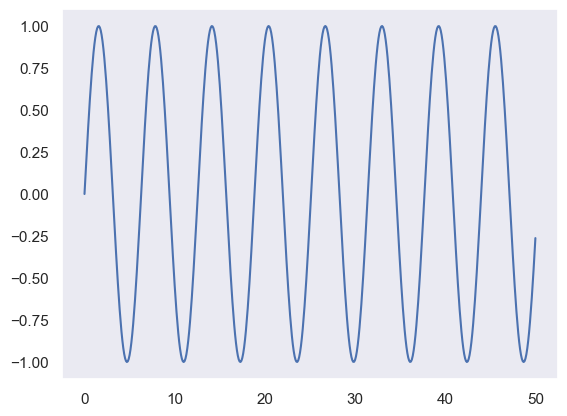

In [13]:
plt.plot(x,y)
plt.show()

In [14]:
df = pd.DataFrame(data=y, index=x, columns=['Sine'])

In [15]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [16]:
len(df)

501

In [17]:
test_percent = 0.1

In [18]:
len(df) * test_percent

50.1

In [19]:
test_point = np.round(len(df) * test_percent)

In [20]:
test_point

50.0

In [21]:
test_ind = int(len(df) - test_point)

In [22]:
test_ind

451

In [23]:
train = df.iloc[:test_ind]

In [24]:
test = df.iloc[test_ind:]

In [25]:
train

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
44.6,0.579164
44.7,0.657656
44.8,0.729577
44.9,0.794208


In [26]:
test

,Sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591
45.6,0.998900
45.7,0.989229
45.8,0.969673
45.9,0.940429
46.0,0.901788


In [27]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()

In [30]:
scaler.fit(train)

MinMaxScaler()

In [31]:
scaled_train = scaler.transform(train)

In [32]:
scaled_test = scaler.transform(test)

In [35]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [37]:
# help(TimeseriesGenerator)

In [39]:
scaled_train

array([[4.99999116e-01],
       [5.49916225e-01],
       [5.99334579e-01],
       [6.47760405e-01],
       [6.94709850e-01],
       [7.39713809e-01],
       [7.82322618e-01],
       [8.22110545e-01],
       [8.58680040e-01],
       [8.91665714e-01],
       [9.20737985e-01],
       [9.45606372e-01],
       [9.66022399e-01],
       [9.81782075e-01],
       [9.92727935e-01],
       [9.98750612e-01],
       [9.99789928e-01],
       [9.95835500e-01],
       [9.86926839e-01],
       [9.73152957e-01],
       [9.54651478e-01],
       [9.31607263e-01],
       [9.04250562e-01],
       [8.72854714e-01],
       [8.37733417e-01],
       [7.99237589e-01],
       [7.57751870e-01],
       [7.13690771e-01],
       [6.67494535e-01],
       [6.19624741e-01],
       [5.70559686e-01],
       [5.20789614e-01],
       [4.70811810e-01],
       [4.21125636e-01],
       [3.72227539e-01],
       [3.24606094e-01],
       [2.78737119e-01],
       [2.35078919e-01],
       [1.94067715e-01],
       [1.56113277e-01],


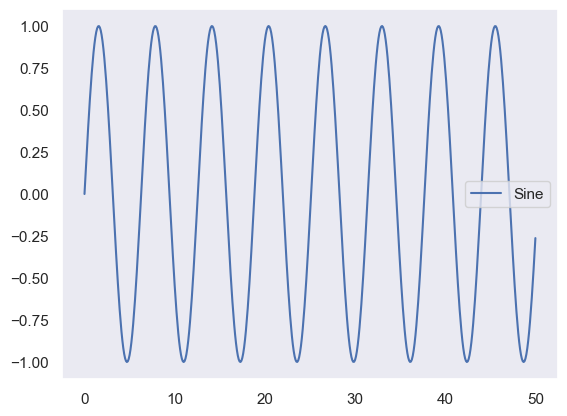

In [62]:
df.plot()
plt.show()

In [53]:
length = 25
batch_size = 1

generator = TimeseriesGenerator(data=scaled_train, targets=scaled_train, length=length, batch_size=batch_size)

In [54]:
len(scaled_train)

451

In [55]:
len(generator)

426

In [56]:
X,y = generator[0]

In [57]:
X

array([[[0.49999912],
        [0.54991622],
        [0.59933458],
        [0.64776041],
        [0.69470985],
        [0.73971381],
        [0.78232262],
        [0.82211054],
        [0.85868004],
        [0.89166571],
        [0.92073798],
        [0.94560637],
        [0.9660224 ],
        [0.98178208],
        [0.99272794],
        [0.99875061],
        [0.99978993],
        [0.9958355 ],
        [0.98692684],
        [0.97315296],
        [0.95465148],
        [0.93160726],
        [0.90425056],
        [0.87285471],
        [0.83773342]]])

In [58]:
y

array([[0.79923759]])

In [46]:
scaled_train

array([[4.99999116e-01],
       [5.49916225e-01],
       [5.99334579e-01],
       [6.47760405e-01],
       [6.94709850e-01],
       [7.39713809e-01],
       [7.82322618e-01],
       [8.22110545e-01],
       [8.58680040e-01],
       [8.91665714e-01],
       [9.20737985e-01],
       [9.45606372e-01],
       [9.66022399e-01],
       [9.81782075e-01],
       [9.92727935e-01],
       [9.98750612e-01],
       [9.99789928e-01],
       [9.95835500e-01],
       [9.86926839e-01],
       [9.73152957e-01],
       [9.54651478e-01],
       [9.31607263e-01],
       [9.04250562e-01],
       [8.72854714e-01],
       [8.37733417e-01],
       [7.99237589e-01],
       [7.57751870e-01],
       [7.13690771e-01],
       [6.67494535e-01],
       [6.19624741e-01],
       [5.70559686e-01],
       [5.20789614e-01],
       [4.70811810e-01],
       [4.21125636e-01],
       [3.72227539e-01],
       [3.24606094e-01],
       [2.78737119e-01],
       [2.35078919e-01],
       [1.94067715e-01],
       [1.56113277e-01],


In [63]:
length = 50
batch_size = 1

generator = TimeseriesGenerator(data=scaled_train, targets=scaled_train, length=length, batch_size=batch_size)

In [65]:
layers = tf.keras.layers

In [66]:
n_features = 1

In [67]:
model = tf.keras.models.Sequential([
    layers.SimpleRNN(50, input_shape=(length, n_features)),

    layers.Dense(1)
    
])

model.compile(loss='mse', optimizer='adam')

In [68]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 2651 (10.36 KB)
Trainable params: 2651 (10.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [72]:
model.fit(generator, epochs=5)

Epoch 1/5
401/401 [==============================] - 4s 10ms/step - loss: 0.0070
Epoch 2/5
401/401 [==============================] - 4s 10ms/step - loss: 4.8467e-05
Epoch 3/5
401/401 [==============================] - 4s 10ms/step - loss: 4.3001e-05
Epoch 4/5
401/401 [==============================] - 4s 9ms/step - loss: 3.1062e-05
Epoch 5/5
401/401 [==============================] - 4s 10ms/step - loss: 3.7206e-05


In [73]:
losses = pd.DataFrame(model.history.history)

<Axes: >

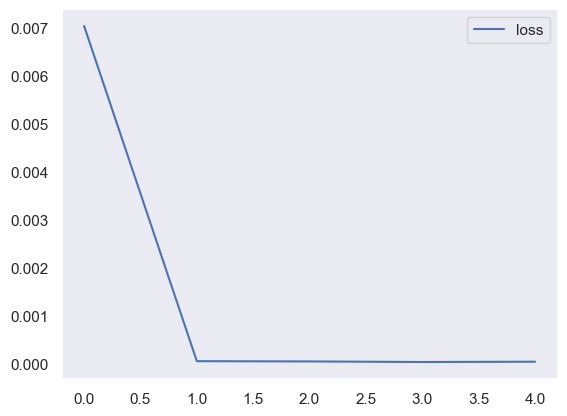

In [74]:
losses.plot()

In [79]:
first_eval_batch = scaled_train[-length:]

In [80]:
first_eval_batch = first_eval_batch.reshape(1, length, n_features)

In [81]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 32ms/step


array([[0.9493482]], dtype=float32)

In [82]:
scaled_test[0]

array([0.94955134])

In [92]:
# test_predictions = []

# first_eval_batch = scaled_train[-length:]
# current_batch = first_eval_batch.reshape(1, length, n_features)


In [93]:
# current_batch

In [94]:
# predicted_value = [[[99]]]
# np.append(current_batch[:,1:,:], [[[99]]], axis=1)

In [100]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape(1, length, n_features)

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis=1)

1/1 [==============================] - 0s 29ms/step


In [101]:
test_predictions

[array([0.9493482], dtype=float32),
 array([0.9673355], dtype=float32),
 array([0.98026645], dtype=float32),
 array([0.9881073], dtype=float32),
 array([0.99129194], dtype=float32),
 array([0.9902765], dtype=float32),
 array([0.985658], dtype=float32),
 array([0.97812176], dtype=float32),
 array([0.96780294], dtype=float32),
 array([0.95449567], dtype=float32),
 array([0.9357489], dtype=float32),
 array([0.904874], dtype=float32),
 array([0.8688084], dtype=float32),
 array([0.83169156], dtype=float32),
 array([0.7912249], dtype=float32),
 array([0.74883854], dtype=float32),
 array([0.70500463], dtype=float32),
 array([0.66092986], dtype=float32),
 array([0.61481106], dtype=float32),
 array([0.56604844], dtype=float32),
 array([0.51681525], dtype=float32),
 array([0.46663877], dtype=float32),
 array([0.4160186], dtype=float32),
 array([0.367234], dtype=float32),
 array([0.32006308], dtype=float32),
 array([0.27465233], dtype=float32),
 array([0.23188308], dtype=float32),
 array([0.19149

In [97]:
scaled_test

array([[9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],
       [7.50127132e-01],
       [7.05655314e-01],
       [6.59128649e-01],
       [6.11012013e-01],
       [5.61786173e-01],
       [5.11942978e-01],
       [4.61980443e-01],
       [4.12397778e-01],
       [3.63690397e-01],
       [3.16344967e-01],
       [2.70834550e-01],
       [2.27613868e-01],
       [1.87114770e-01],
       [1.49741909e-01],
       [1.15868702e-01],
       [8.58335998e-02],
       [5.99367021e-02],
       [3.84367625e-02],
       [2.15486014e-02],
       [9.44095974e-03],
       [2.23481297e-03],
       [2.16257798e-06],
       [2.76531647e-03],
       [1.04966661e-02],
       [2.31189624e-02],


In [102]:
true_predictions = scaler.inverse_transform(test_predictions)

In [103]:
true_predictions

array([[ 0.89869098],
       [ 0.93466531],
       [ 0.96052696],
       [ 0.97620858],
       [ 0.98257776],
       [ 0.98054693],
       [ 0.97130995],
       [ 0.95623761],
       [ 0.93560014],
       [ 0.90898581],
       [ 0.87149252],
       [ 0.80974332],
       [ 0.73761263],
       [ 0.66337957],
       [ 0.58244689],
       [ 0.49767486],
       [ 0.41000774],
       [ 0.3218589 ],
       [ 0.22962205],
       [ 0.13209759],
       [ 0.03363199],
       [-0.06672015],
       [-0.16795967],
       [-0.26552812],
       [-0.35986918],
       [-0.45068995],
       [-0.53622777],
       [-0.61699812],
       [-0.69305062],
       [-0.76327068],
       [-0.82580296],
       [-0.87813646],
       [-0.92015556],
       [-0.9539064 ],
       [-0.97870556],
       [-0.9912416 ],
       [-0.99177765],
       [-0.98328915],
       [-0.96614254],
       [-0.93830683],
       [-0.89927835],
       [-0.85160653],
       [-0.79865839],
       [-0.74027936],
       [-0.67326153],
       [-0

In [104]:
test['Predictions'] = true_predictions

C:\Users\Nagant\AppData\Local\Temp\ipykernel_20432\4269337381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [105]:
test

,Sine,Predictions
45.1,0.899097,0.898691
45.2,0.938307,0.934665
45.3,0.968142,0.960527
45.4,0.988304,0.976209
45.5,0.998591,0.982578
45.6,0.998900,0.980547
45.7,0.989229,0.971310
45.8,0.969673,0.956238
45.9,0.940429,0.935600
46.0,0.901788,0.908986


<Axes: >

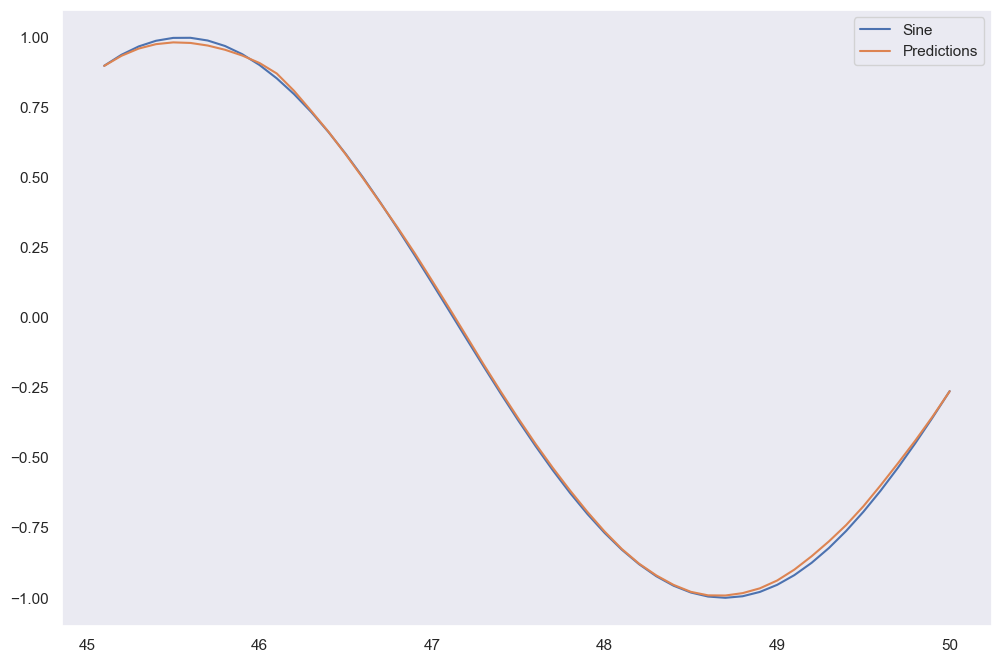

In [106]:
test.plot(figsize=(12,8))

In [107]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)

In [110]:
length = 49

generator = tf.keras.preprocessing.sequence.TimeseriesGenerator(data=scaled_train, targets=scaled_train, batch_size=batch_size, length=length)

validation_generator = tf.keras.preprocessing.sequence.TimeseriesGenerator(data=scaled_test, targets=scaled_test, length=length, batch_size=batch_size)

In [111]:
model = tf.keras.models.Sequential([
    layers.LSTM(50, input_shape=(length, n_features)),

    layers.Dense(1)
    
])

model.compile(loss='mse', optimizer='adam')

In [112]:
model.fit(generator, validation_data=validation_generator, callbacks=[early_stopping], epochs=20)

Epoch 1/20
402/402 [==============================] - 10s 19ms/step - loss: 0.0156 - val_loss: 2.0293e-04
Epoch 2/20
402/402 [==============================] - 7s 17ms/step - loss: 4.4176e-04 - val_loss: 1.5241e-04
Epoch 3/20
402/402 [==============================] - 6s 16ms/step - loss: 2.1214e-04 - val_loss: 8.7337e-06
Epoch 4/20
402/402 [==============================] - 6s 15ms/step - loss: 4.2491e-04 - val_loss: 3.1406e-05
Epoch 5/20
402/402 [==============================] - 6s 15ms/step - loss: 1.1680e-04 - val_loss: 1.4214e-06
Epoch 6/20
402/402 [==============================] - 6s 15ms/step - loss: 1.3664e-04 - val_loss: 5.8014e-05
Epoch 7/20
402/402 [==============================] - 6s 16ms/step - loss: 6.8360e-05 - val_loss: 1.0175e-04


In [113]:
losses = pd.DataFrame(model.history.history)

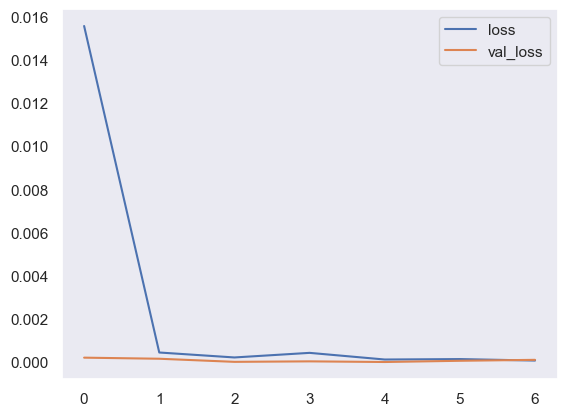

In [115]:
losses.plot()
plt.show()

In [116]:
first_eval = scaled_train[-length:].reshape(1,length,n_features)

In [117]:
model.predict(first_eval)

1/1 [==============================] - 1s 873ms/step


array([[0.9499624]], dtype=float32)

In [118]:
scaled_test[0]

array([0.94955134])

In [120]:
test_predictions = []
eval = scaled_train[-length:].reshape(1,length,n_features)

for _ in range(len(scaled_test)):
    pred = model.predict(eval)
    test_predictions.append(pred[0])
    eval = np.append(eval[:,1:,:], [pred], axis=1)

1/1 [==============================] - 0s 38ms/step


In [122]:
test_predictions

[array([0.9499624], dtype=float32),
 array([0.9689621], dtype=float32),
 array([0.98298746], dtype=float32),
 array([0.9919358], dtype=float32),
 array([0.9957693], dtype=float32),
 array([0.99451333], dtype=float32),
 array([0.98824996], dtype=float32),
 array([0.97711045], dtype=float32),
 array([0.96126586], dtype=float32),
 array([0.9409194], dtype=float32),
 array([0.9163006], dtype=float32),
 array([0.8876603], dtype=float32),
 array([0.85526633], dtype=float32),
 array([0.8194041], dtype=float32),
 array([0.7803735], dtype=float32),
 array([0.738492], dtype=float32),
 array([0.6940942], dtype=float32),
 array([0.6475352], dtype=float32),
 array([0.599191], dtype=float32),
 array([0.5494607], dtype=float32),
 array([0.49876732], dtype=float32),
 array([0.44755632], dtype=float32),
 array([0.3962957], dtype=float32),
 array([0.3454722], dtype=float32),
 array([0.2955885], dtype=float32),
 array([0.2471581], dtype=float32),
 array([0.2006995], dtype=float32),
 array([0.15673007], d

In [123]:
true_predictions = scaler.inverse_transform(test_predictions)

In [124]:
true_predictions

array([[ 0.8999193 ],
       [ 0.93791839],
       [ 0.96596894],
       [ 0.98386545],
       [ 0.99153245],
       [ 0.9890205 ],
       [ 0.97649385],
       [ 0.954215  ],
       [ 0.92252609],
       [ 0.88183349],
       [ 0.83259628],
       [ 0.7753162 ],
       [ 0.71052873],
       [ 0.63880489],
       [ 0.5607443 ],
       [ 0.47698196],
       [ 0.38818701],
       [ 0.29506981],
       [ 0.1983822 ],
       [ 0.09892239],
       [-0.00246358],
       [-0.10488476],
       [-0.20740517],
       [-0.30905138],
       [-0.40881796],
       [-0.50567798],
       [-0.59859444],
       [-0.68653258],
       [-0.76847695],
       [-0.84344912],
       [-0.91052997],
       [-0.96888339],
       [-1.01778141],
       [-1.0566278 ],
       [-1.08497738],
       [-1.10254844],
       [-1.10922605],
       [-1.10505603],
       [-1.09023186],
       [-1.06507457],
       [-1.03001119],
       [-0.98555158],
       [-0.93226869],
       [-0.87078023],
       [-0.80173635],
       [-0

In [126]:
test['LSTM Predictions'] = true_predictions

C:\Users\Nagant\AppData\Local\Temp\ipykernel_20432\2844857802.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['LSTM Predictions'] = true_predictions


In [127]:
test

,Sine,Predictions,LSTM Predictions
45.1,0.899097,0.898691,0.899919
45.2,0.938307,0.934665,0.937918
45.3,0.968142,0.960527,0.965969
45.4,0.988304,0.976209,0.983865
45.5,0.998591,0.982578,0.991532
45.6,0.998900,0.980547,0.989020
45.7,0.989229,0.971310,0.976494
45.8,0.969673,0.956238,0.954215
45.9,0.940429,0.935600,0.922526
46.0,0.901788,0.908986,0.881833


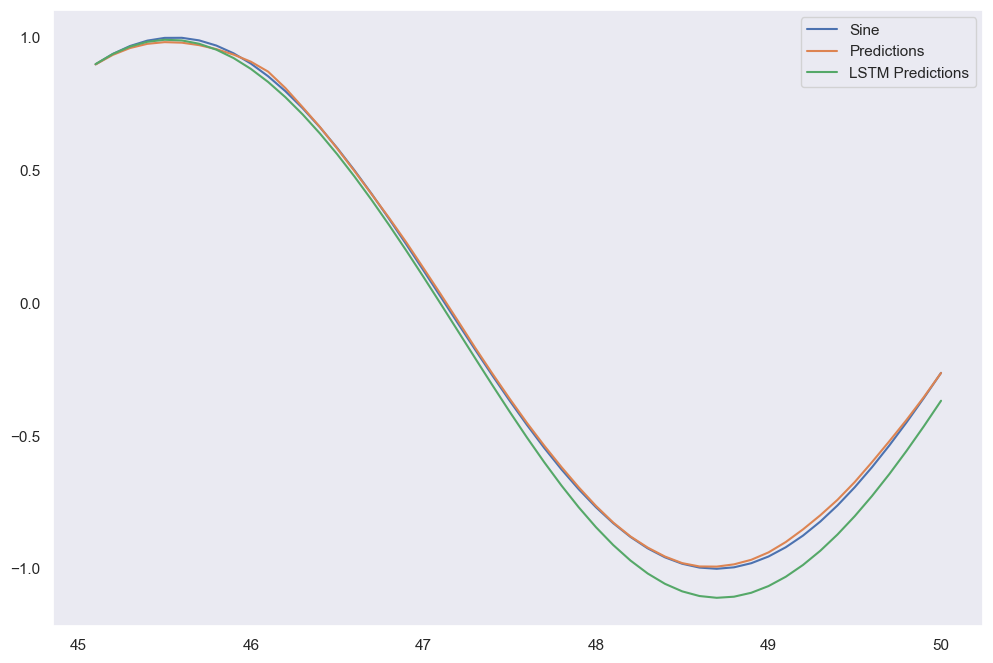

In [131]:
test.plot(figsize=(12,8))
plt.show()

In [132]:
scaled_full_data = scaler.fit_transform(df)

In [133]:
full_data_generator = tf.keras.preprocessing.sequence.TimeseriesGenerator(data=scaled_full_data, targets=scaled_full_data, length=length, batch_size=batch_size)

In [135]:
model = tf.keras.models.Sequential([
    layers.LSTM(50, input_shape=(length, n_features)),
    layers.Dense(1),
])

model.compile(loss='mse', optimizer='adam')

In [136]:
model.fit(generator, epochs=7)

Epoch 1/7
402/402 [==============================] - 9s 17ms/step - loss: 0.0142
Epoch 2/7
402/402 [==============================] - 6s 15ms/step - loss: 1.5770e-04
Epoch 3/7
402/402 [==============================] - 6s 15ms/step - loss: 6.7520e-05
Epoch 4/7
402/402 [==============================] - 6s 15ms/step - loss: 2.2347e-04
Epoch 5/7
402/402 [==============================] - 6s 15ms/step - loss: 7.4379e-05
Epoch 6/7
402/402 [==============================] - 6s 15ms/step - loss: 9.0667e-05
Epoch 7/7
402/402 [==============================] - 6s 15ms/step - loss: 4.2656e-04


In [137]:
losses = pd.DataFrame(model.history.history)

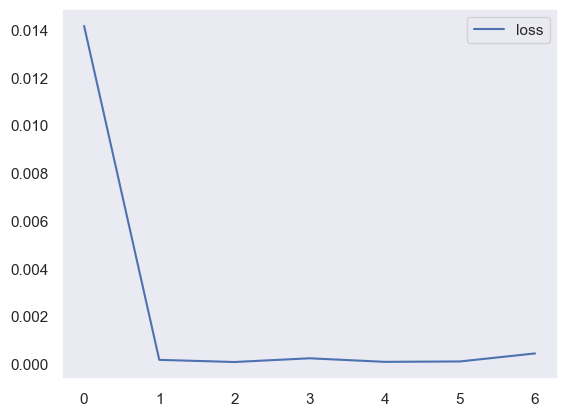

In [139]:
losses.plot()
plt.show()

In [143]:
forecast = []
eval = scaled_full_data[-length:].reshape(1,length,n_features)

for _ in range(25):
    pred = model.predict(eval)
    forecast.append(pred[0])
    eval = np.append(eval[:,1:,:], [pred], axis=1)

1/1 [==============================] - 0s 38ms/step


In [144]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [145]:
forecast = scaler.inverse_transform(forecast)

In [150]:
forecast

array([[-0.16999772],
       [-0.07003301],
       [ 0.03113481],
       [ 0.13264655],
       [ 0.2335781 ],
       [ 0.33296447],
       [ 0.42981409],
       [ 0.52312727],
       [ 0.61191841],
       [ 0.69523144],
       [ 0.77216302],
       [ 0.84188129],
       [ 0.90364671],
       [ 0.95682888],
       [ 1.00091856],
       [ 1.03553809],
       [ 1.06044667],
       [ 1.0755363 ],
       [ 1.08082629],
       [ 1.07644968],
       [ 1.06263987],
       [ 1.03971324],
       [ 1.00805103],
       [ 0.96808477],
       [ 0.92028318]])

In [151]:
df

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [152]:
forecast_index = np.arange(50.1, 52.6, step=0.1)

In [153]:
len(forecast_index)

25

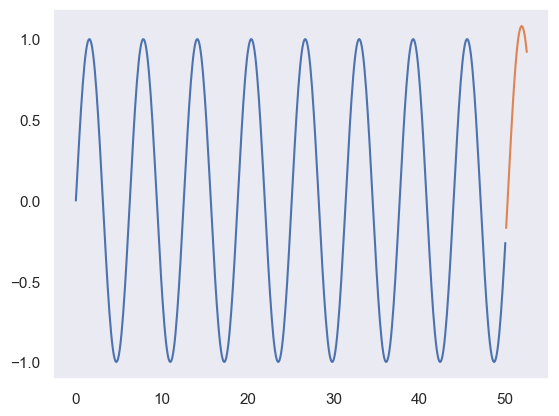

In [172]:
plt.plot(df)
plt.plot(forecast_index, forecast)
plt.show()

In [177]:
forecast_df = pd.concat([df, pd.DataFrame(data=forecast, index=forecast_index, columns=['Forecast'])], axis=0)

<Axes: >

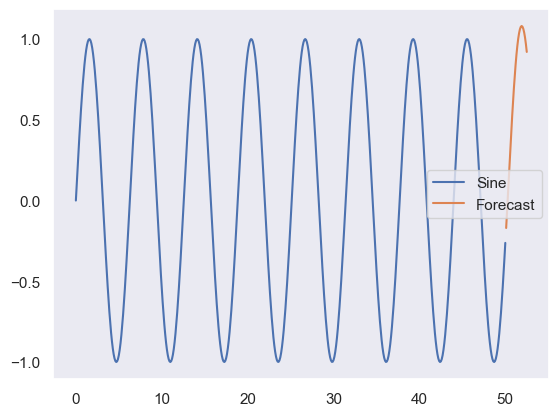

In [178]:
forecast_df.plot()

In [186]:
forecast_df.iloc[500:]

,Sine,Forecast
50.0,-0.262375,NaN
50.1,NaN,-0.169998
50.2,NaN,-0.070033
50.3,NaN,0.031135
50.4,NaN,0.132647
50.5,NaN,0.233578
50.6,NaN,0.332964
50.7,NaN,0.429814
50.8,NaN,0.523127
50.9,NaN,0.611918
